In [1]:
%matplotlib inline

import matplotlib

import nengo
import numpy as np
import nengo_ocl

import nengo.probe

import matplotlib.pyplot as plt   
import pickle

from stp_ocl_implementation import *
from nengo_extras.vision import Gabor, Mask
from nengo_extras.plot_spikes import (
    cluster, merge, plot_spikes, preprocess_spikes, sample_by_variance)

In [2]:
def input_func(t):
    if t > 0.06 and t < .3:
        return 0.12
    elif t > 0.5 and t < 0.55:
        return 0.12
    else:
        return 0 
    

D=1  #Dimensions
N=1 #Neurons per dimension

with nengo.Network(seed=1) as model:
    
    #The input of the network
    model.input = nengo.Node(input_func)
   
    #WM ensemble 1 (represents input stimulus, might be unnecessary)
    model.LIFens1 = nengo.Ensemble(
        D*N,
        dimensions=D,  
        neuron_type=stpLIF(),      #use newly defined stpLIF
        intercepts=Uniform(.1,.1),
        encoders=[[1]]) 
     
    
    #WM ensemble 2 (template layer)
    model.LIFens2 = nengo.Ensemble(
        D*N,
        dimensions=D,  
        neuron_type=stpLIF(),      #use newly defined stpLIF
        intercepts=Uniform(.1, .1),
        encoders=[[1]])  
 
    

    nengo.Connection(model.input, model.LIFens1)
    

    
    con12=nengo.Connection(model.LIFens1, model.LIFens2, solver=nengo.solvers.LstsqL2(weights=True))
    con12.learning_rule_type = STP()

  
    #probes ens1
    spikes = nengo.Probe(model.LIFens1.neurons, 'spikes')  # The raw spikes from the neuron
    #voltage = nengo.Probe(model.LIFens1.neurons,'voltage')  # Subthreshold soma voltage of the neuron
    filtered = nengo.Probe(model.LIFens1, synapse=0.01)  # Spikes filtered by a 10ms post-synaptic filter
    resources = nengo.Probe(model.LIFens1.neurons,'resources') 
    calcium = nengo.Probe(model.LIFens1.neurons,'calcium') 

    #probes ens2
    voltage2 = nengo.Probe(model.LIFens2.neurons,'voltage') 
    spikes2 = nengo.Probe(model.LIFens2.neurons, 'spikes')
    filtered2 = nengo.Probe(model.LIFens2, synapse=0.01)
    
    #probescon12
    weights=nengo.Probe(con12, 'weights')


In [3]:
s=1
with nengo.Simulator(model) as sim:  
    sim.run(0.7)      

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

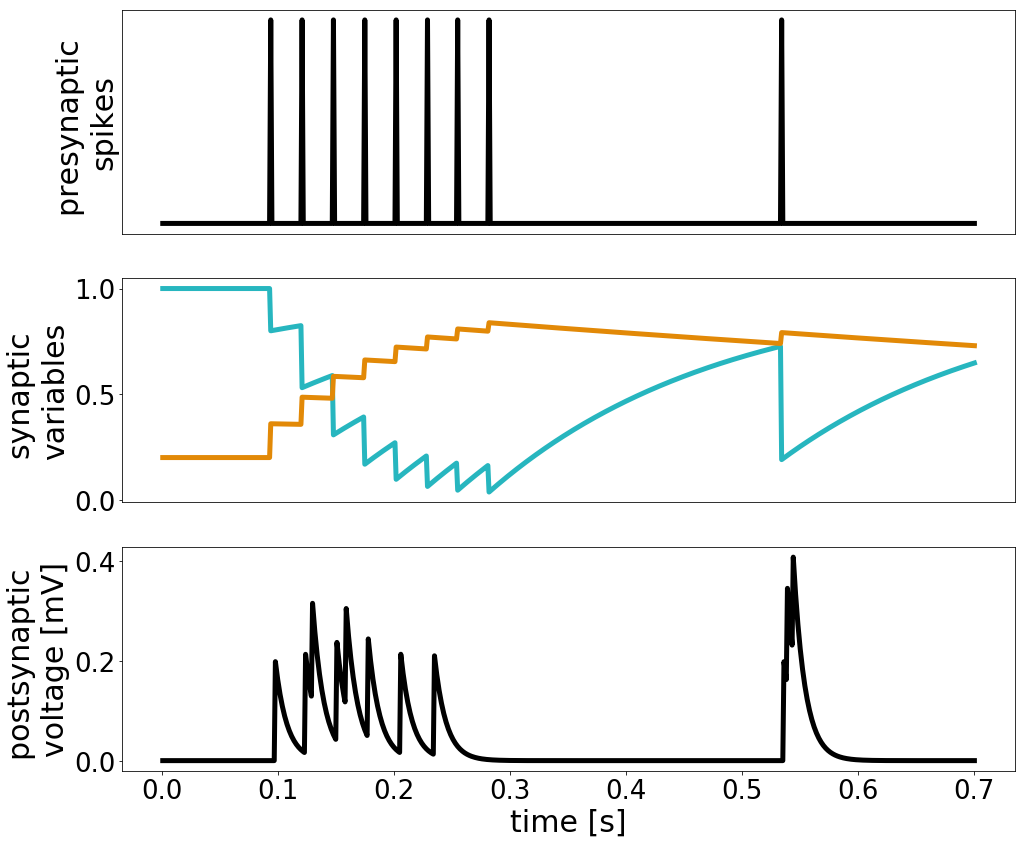

In [5]:
#CREATE FIGURE_21

t=sim.trange()    


plt.figure(figsize=(16, 14))
plt.rcParams.update({'font.size': 30})
plt.subplot(3, 1, 1)
plt.rc('xtick', labelsize=26) 
plt.rc('ytick', labelsize=26) 
plt.plot(sim.trange(), sim.data[spikes],linewidth=5, color="black")
plt.ylabel("presynaptic \nspikes")
plt.xticks([])
plt.yticks([])
#plt.xlabel("t [s]")
plt.subplot(3, 1, 3)
plt.plot(sim.trange(), sim.data[filtered2],linewidth=5, color="black")
plt.xlabel("time [s]")
plt.ylabel("postsynaptic \nvoltage [mV]")
plt.subplot(3, 1, 2)
plt.plot(sim.trange(), sim.data[resources],linewidth=5, color="#27b6bf")
plt.plot(sim.trange(), sim.data[calcium],linewidth=5, color="#e28907")
#plt.xlabel("t [s]")
plt.ylabel("synaptic \nvariables");
plt.xticks([])
plt.savefig('mongillo.eps',dpi=1000)

